In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("./mushroom_cleaned.csv")

In [3]:
df.head(21)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
5,1337,6,2,10,3.775635,1520,11,0.943195,1
6,1300,2,2,10,3.835320,1563,11,1.804273,1
7,1354,6,2,10,3.676160,1532,11,0.888450,1
8,1222,6,2,10,3.771656,1476,11,0.943195,1
9,1085,6,2,10,3.775635,1581,11,0.888450,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


![alt text](mushroom.jpg)

- cap-diameter: Đường kính mũ nấm
- cap-shape: Hình dạng mũ nấm
- gill-attachment: Vị trí bám của mang nấm
- gill-color: Màu sắc của mang nấm
- stem-height: Chiều cao của thân nấm
- stem-width: Chiều rộng của thân nấm
- stem-color: Màu sắc của thân nấm
- season: Mùa nấm mọc
- class: Loại nấm ( Ăn được hoặc có độc)

# Phân tích dữ liệu

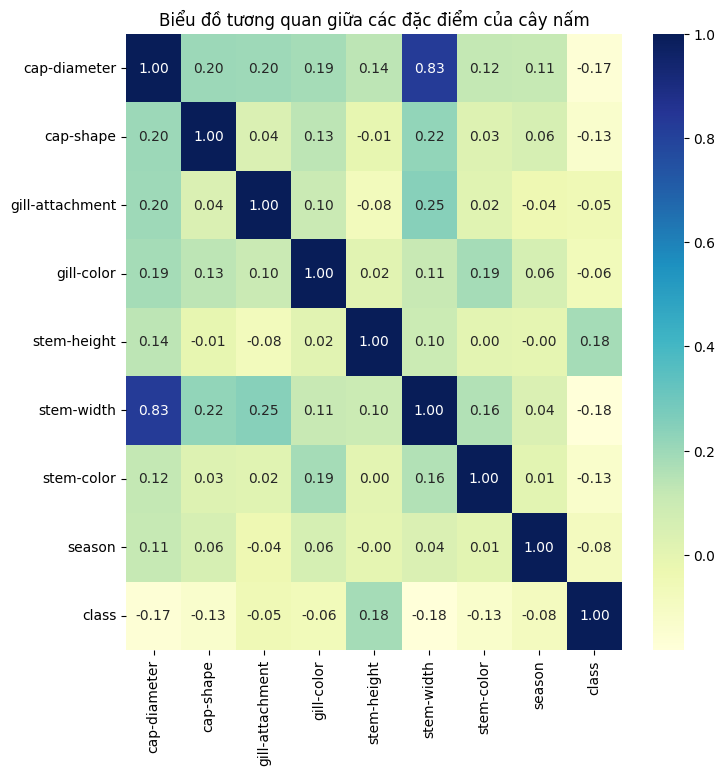

In [5]:
plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.title("Biểu đồ tương quan giữa các đặc điểm của cây nấm")
plt.show()

# Tổng số và tỉ lệ nấm Ăn được và Có độc

In [6]:
totalEdiblePoisonous = df['class'].value_counts()

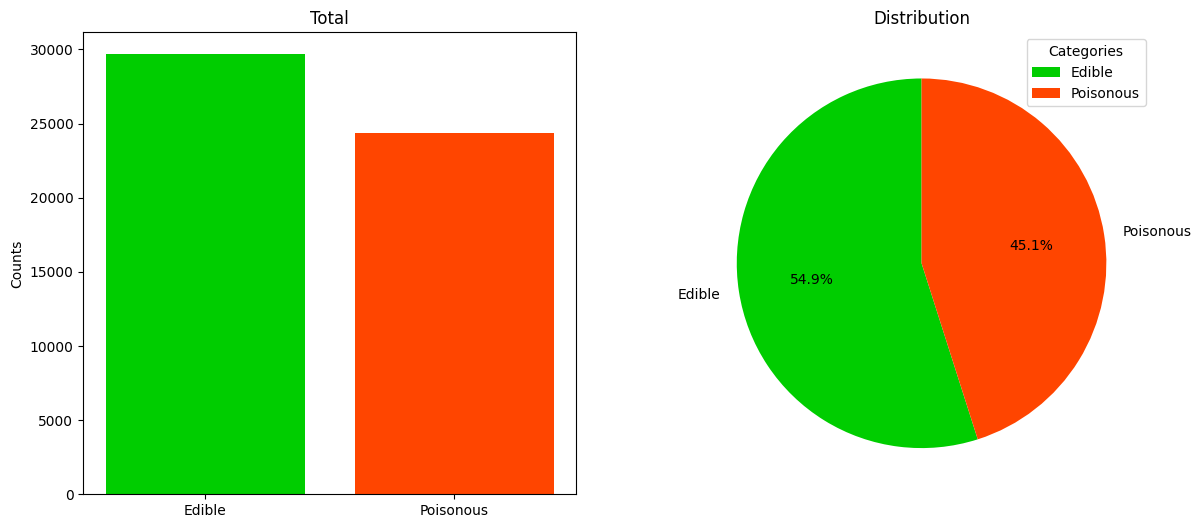

In [7]:
plt.figure(figsize=(14, 6))

ax1 = plt.subplot2grid((1,2), (0,0))
ax1.bar(['Edible', 'Poisonous'], totalEdiblePoisonous.values, color=['#00CD00', '#FF4500'])
ax1.set_ylabel('Counts')
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_title('Total')

ax2 = plt.subplot2grid((1,2), (0,1))
ax2.pie(totalEdiblePoisonous.values, labels=['Edible', 'Poisonous'], autopct='%1.1f%%', startangle=90, colors=['#00CD00', '#FF4500'])
ax2.set_title('Distribution')
ax2.legend(title="Categories", bbox_to_anchor=(1, 1))

plt.show()

# Tương quan giữa nấm Ăn được và Có độc với từng cột

C:\Users\admin\AppData\Local\Temp\ipykernel_4552\751748839.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({'Ăn được':0,'Có độc':1})


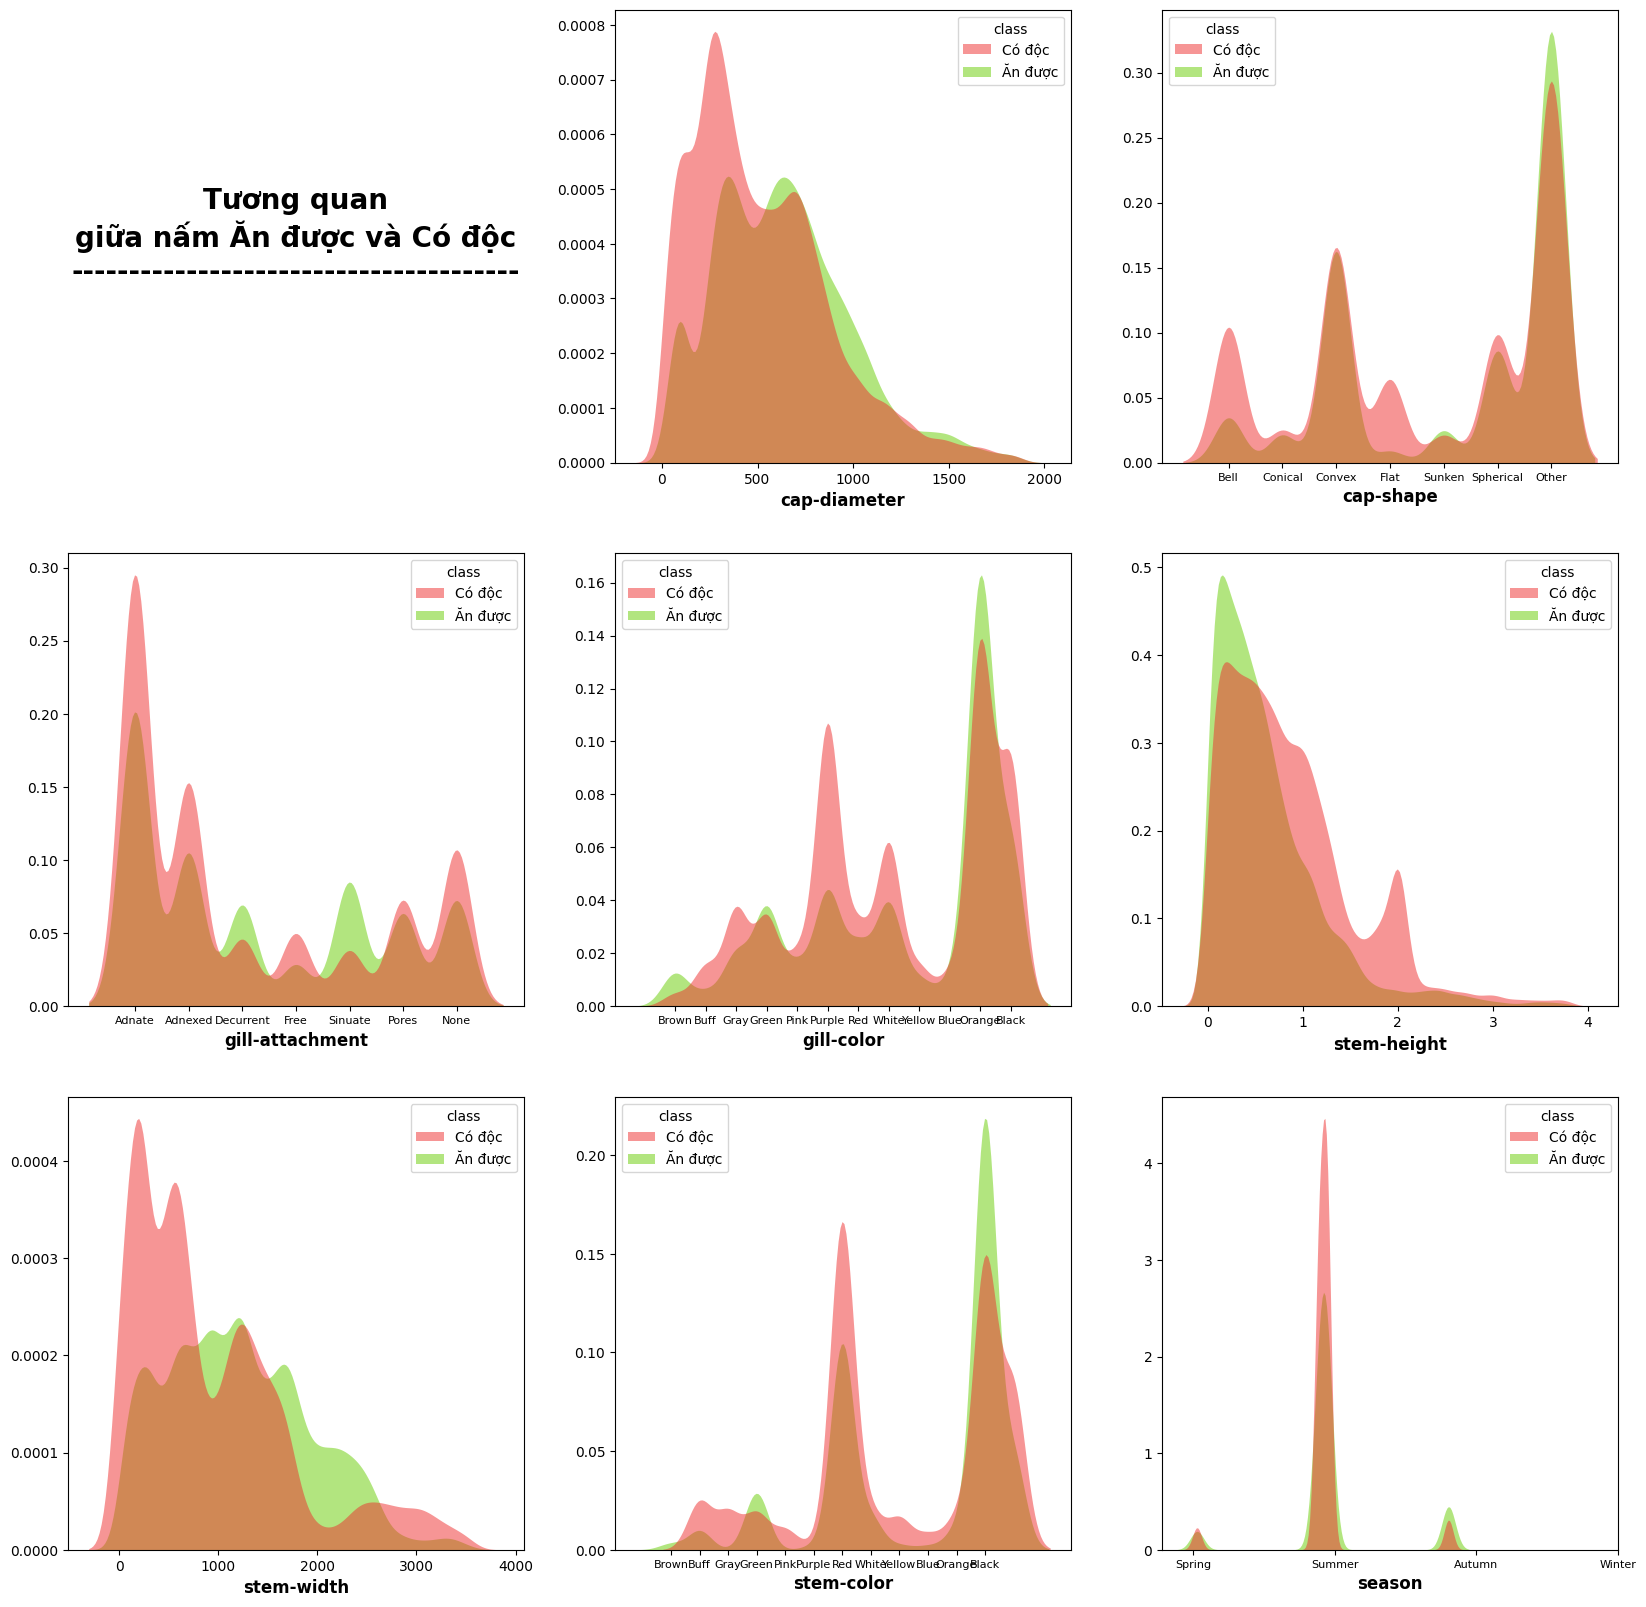

In [8]:
# Tảo bảng mới với chỉ số và tên tương ứng
column_mappings = {
    'cap-shape': {0:'Bell', 1:'Conical', 2:'Convex', 3:'Flat', 4:'Sunken', 5:'Spherical', 6:'Other'},
    'gill-attachment': {0:'Adnate', 1:'Adnexed', 2:'Decurrent', 3:'Free', 4:'Sinuate', 5:'Pores', 6:'None'},
    'gill-color': {0:'Brown', 1:'Buff', 2:'Gray', 3:'Green', 4:'Pink', 5:'Purple', 6:'Red', 7:'White', 8:'Yellow', 9:'Blue', 10:'Orange', 11:'Black'},
    'stem-color': {0:'Brown', 1:'Buff', 2:'Gray', 3:'Green', 4:'Pink', 5:'Purple', 6:'Red', 7:'White', 8:'Yellow', 9:'Blue', 10:'Orange', 11:'Black'},
    'season': {0:'Spring', 1:'Summer', 2:'Autumn', 3:'Winter'}
}

# Tạo lưới
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes[0, 0].axis('off') # Không vẽ trục lên ô (0, 0)

# Đặt lại tên
df['class'] = df['class'].replace({0:'Ăn được',1:'Có độc'})

# Chỉ định palette màu
palette = sns.color_palette(['#EE2C2C', '#66CD00'])

# Vẽ vào các ô trong mạng lưới
for col, ax in zip(df.columns[:-1], axes.flat[1:]):
    sns.kdeplot(data=df, x=col, ax=ax, hue=df['class'], palette=palette, alpha=.5, linewidth=0, fill=True)
    ax.set_xlabel(col, fontsize=12, fontweight='bold')
    ax.set_ylabel('')
    if col in column_mappings.keys():
        ax.set_xticks(list(column_mappings[col].keys()))
        ax.set_xticklabels(column_mappings[col].values(), fontsize=8)

# Hiển thị văn bản trong ô (0, 0)
axes[0, 0].text(0.5, 0.5, 'Tương quan\ngiữa nấm Ăn được và Có độc\n---------------------------------------', ha='center', va='center', fontsize=20, fontweight='bold')

df['class'] = df['class'].replace({'Ăn được':0,'Có độc':1})

plt.show()


## Outlier của dữ liệu 

Text(0.5, 0, 'stem-width')

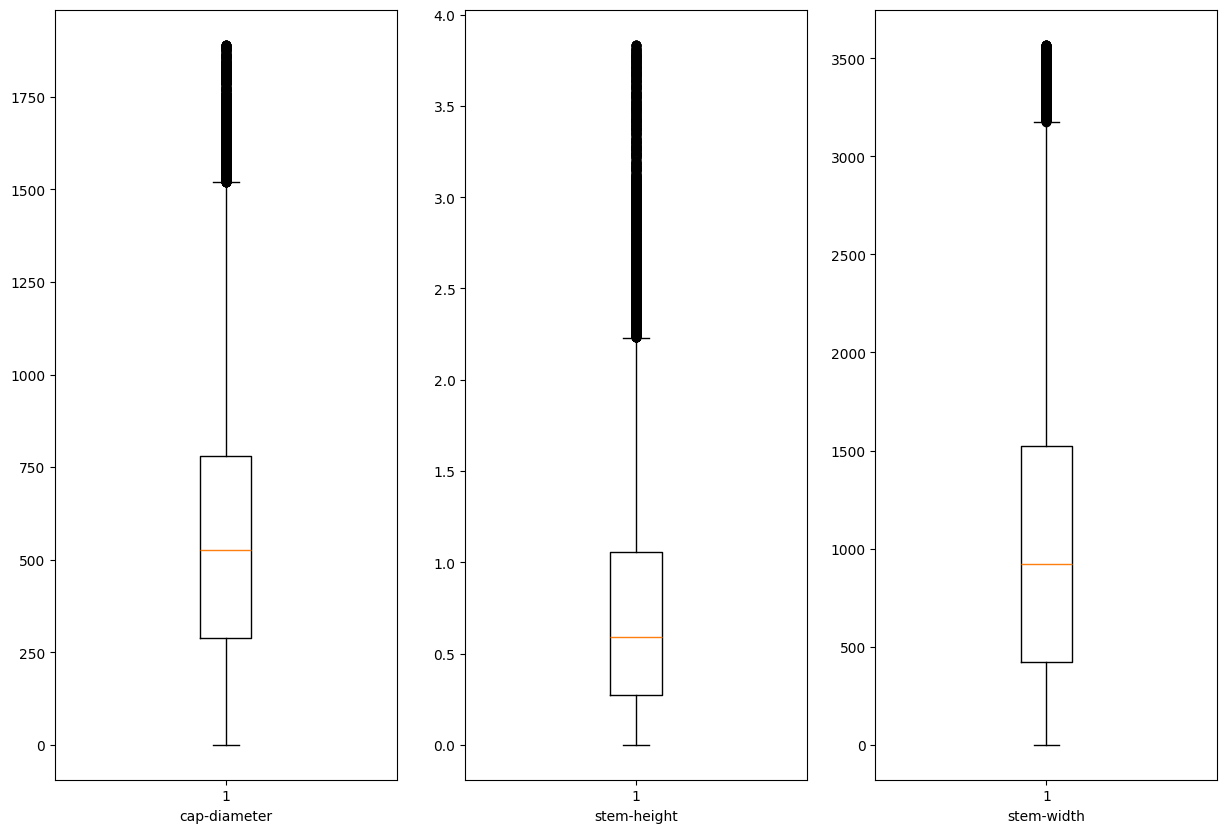

In [9]:
fig, axes = plt.subplots(1,3 , figsize=(15, 10))
axes[0].boxplot(data=df, x = "cap-diameter")
axes[0].set_xlabel("cap-diameter")
axes[1].boxplot(data=df, x = "stem-height")
axes[1].set_xlabel("stem-height")
axes[2].boxplot(data=df, x = "stem-width")
axes[2].set_xlabel("stem-width")

# Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [11]:
LR = LogisticRegression(max_iter=200)

In [12]:
# Baseline
X = df.drop(columns=['class'])
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify = y)
X_val, X_train, y_val, y_train = train_test_split(X_train, y_train, test_size=0.1, random_state=0, stratify=y_train)
LR.fit(X_train, y_train).score(X_val, y_val)

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6347019443873237

In [13]:
# Xử lý outlier

from scipy import stats

# Hàm để loại bỏ outlier bằng Z-score
def remove_outliers_zscore(df, column, threshold=2):
    z_scores = np.abs(stats.zscore(df[column]))
    return df[(z_scores < threshold)]

# Loại bỏ outlier trong các cột 'stem-width', 'stem-height'
df = remove_outliers_zscore(df, 'cap-diameter')
df = remove_outliers_zscore(df, 'stem-width')
df = remove_outliers_zscore(df, 'stem-height')

print(df.shape)  # Kích thước dữ liệu sau khi loại bỏ outlier


(46211, 9)


In [14]:
X = df.drop(columns=['class'])
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify = y)
X_val, X_train, y_val, y_train = train_test_split(X_train, y_train, test_size=0.1, random_state=0, stratify=y_train)
LR.fit(X_train, y_train).score(X_val, y_val)

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6350520972481967

In [15]:
# Chuẩn hóa
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X) # Tính trung bình và độ lệch chuẩn của từng đặc trưng
X_scaler = scaler.transform(X) # Trừ tb và chia cho độ lệch chuẩn

In [16]:
# Dùng Regularization và cross validation
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga', 'sag']
}
LR_regu = GridSearchCV(LR, param_grid, scoring='accuracy')
LR_regu.fit(X_train, y_train).score(X_val, y_val)

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\admin\

0.6479829014159765

In [17]:
LR_regu.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}

In [18]:
# Dự đoán
y_pre = LR_regu.predict(X_test)

In [19]:
evaluate = classification_report(y_test, y_pre, output_dict=True)
evaluate_df = pd.DataFrame(evaluate).transpose()
evaluate_df

,precision,recall,f1-score,support
0,0.631948,0.586159,0.608193,2153.000000
1,0.660571,0.702309,0.680801,2469.000000
accuracy,0.648204,0.648204,0.648204,0.648204
macro avg,0.646260,0.644234,0.644497,4622.000000
weighted avg,0.647238,0.648204,0.646979,4622.000000


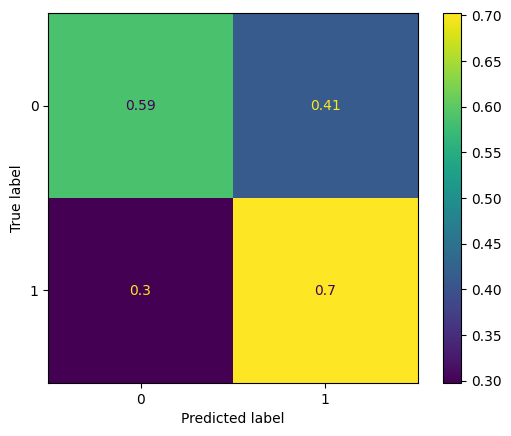

In [20]:
cf = confusion_matrix(y_test, y_pre, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cf)
disp.plot()

# Boosting

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [22]:
# AdaBoost với Decision Tree
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

DT = DecisionTreeClassifier(max_depth=3)
DT_AdaBoost = GridSearchCV(AdaBoostClassifier(DT, random_state=0), param_grid=param_grid)
DT_AdaBoost.fit(X_train, y_train).score(X_val, y_val)

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use t

0.9482767833288805

In [29]:
y_pre = DT_AdaBoost.predict(X_test)
evaluate = classification_report(y_test, y_pre, output_dict=True)
DT_AdaBoost_df = pd.DataFrame(evaluate).transpose()
DT_AdaBoost_df

,precision,recall,f1-score,support
0,0.932907,0.949373,0.941068,2153.000000
1,0.955162,0.940462,0.947755,2469.000000
accuracy,0.944613,0.944613,0.944613,0.944613
macro avg,0.944035,0.944917,0.944412,4622.000000
weighted avg,0.944796,0.944613,0.944640,4622.000000


In [26]:
# Adaboost với KNN
KNN = KNeighborsClassifier(n_neighbors=3)
KNN_AdaBoost = GridSearchCV(AdaBoostClassifier(DT, random_state=0), param_grid=param_grid)
KNN_AdaBoost.fit(X_train, y_train).score(X_val, y_val)

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use t

0.9482767833288805

In [30]:
y_pre = KNN_AdaBoost.predict(X_test)
evaluate = classification_report(y_test, y_pre, output_dict=True)
KNN_AdaBoost_df = pd.DataFrame(evaluate).transpose()
KNN_AdaBoost_df

,precision,recall,f1-score,support
0,0.932907,0.949373,0.941068,2153.000000
1,0.955162,0.940462,0.947755,2469.000000
accuracy,0.944613,0.944613,0.944613,0.944613
macro avg,0.944035,0.944917,0.944412,4622.000000
weighted avg,0.944796,0.944613,0.944640,4622.000000


In [28]:
# Gradient Boosting với mặc định sử dụng cây quyết định
GB_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [1, 3, 5, 7]
}

GB = GradientBoostingClassifier(max_depth=1,random_state=0)
# n_jobs=-1: Sử dụng tất cả các lõi CPU sẵn có để thực hiện việc tìm kiếm siêu tham số song song
GB_grid_search = GridSearchCV(GB, param_grid=GB_param_grid, n_jobs=-1)
GB_grid_search.fit(X_train, y_train).score(X_val, y_val)

0.9760352658295485

In [31]:
y_pre = GB_grid_search.predict(X_test)
evaluate = classification_report(y_test, y_pre, output_dict=True)
GB_grid_search_df = pd.DataFrame(evaluate).transpose()
GB_grid_search_df

,precision,recall,f1-score,support
0,0.969124,0.976777,0.972935,2153.000000
1,0.979608,0.972864,0.976224,2469.000000
accuracy,0.974686,0.974686,0.974686,0.974686
macro avg,0.974366,0.974820,0.974580,4622.000000
weighted avg,0.974725,0.974686,0.974692,4622.000000


In [34]:
# XGBoost 
import xgboost as xgb

# Sử dụng GPU để huấn luyện mô hình
xgb_model = xgb.XGBClassifier(use_label_encoder=False, tree_method='gpu_hist', eval_metric='logloss', random_state=0)
xgb_grid_search = GridSearchCV(xgb_model, param_grid=GB_param_grid, n_jobs=-1)
xgb_grid_search.fit(
    X_train, y_train,
    early_stopping_rounds=10, # Nếu không cải thiện sau 10 vòng lặp thì dừng
    eval_set=[(X_val, y_val)], # Đánh giá hiệu suất
    verbose=True # Hiển thị quá trình
)

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:160: UserWarning: [19:48:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[0]	validation_0-logloss:0.64376
[1]	validation_0-logloss:0.60526
[2]	validation_0-logloss:0.57259
[3]	validation_0-logloss:0.54233
[4]	validation_0-logloss:0.51535
[5]	validation_0-logloss:0.49549
[6]	validation_0-logloss:0.47571
[7]	validation_0-logloss:0.46070
[8]	validation_0-logloss:0.44391
[9]	validation_0-logloss:0.43094
[10]	validation_0-logloss:0.42015
[11]	validation_0-logloss:0.40460
[12]	validation_0-logloss:0.39104
[13]	validation_0-logloss:0.38219
[14]	validation_0-logloss:0.37252
[15]	validation_0-logloss:0.36248
[16]	validation_0-logloss:0.35345
[17]	validation_0-logloss:0.34527
[18]	validation_0-logloss:0.33622
[19]	validation_0-logloss:0.32659
[20]	validation_0-logloss:0.31710
[21]	validation_0-logloss:0.31212
[22]	validation_0-logloss:0.29934
[23]	validation_0-logloss:0.29032
[24]	validation_0-logloss:0.28369
[25]	validation_0-logloss:0.27350
[26]	validation_0-logloss:0.26798
[27]	validation_0-logloss:0.26358
[28]	validation_0-logloss:0.25725
[29]	validation_0-loglos

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [50, 100, 200]})

In [35]:
y_pre = xgb_grid_search.predict(X_test)
evaluate = classification_report(y_test, y_pre, output_dict=True)
xgb_grid_search_df = pd.DataFrame(evaluate).transpose()
xgb_grid_search_df

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:160: UserWarning: [19:48:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:160: UserWarning: [19:48:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the b

,precision,recall,f1-score,support
0,0.964549,0.973061,0.968786,2153.000000
1,0.976327,0.968813,0.972555,2469.000000
accuracy,0.970792,0.970792,0.970792,0.970792
macro avg,0.970438,0.970937,0.970671,4622.000000
weighted avg,0.970840,0.970792,0.970800,4622.000000


# Error Analysis 